### Data visualization, the data contains s3l2 altimetry data, tgauge data, and the remote sensing image.

In [1]:
import sys
sys.path.append("/Users/luo/OneDrive/SAR-Altimetry/sentinel3-altimetry-l2/utils")
import matplotlib.pyplot as plt
import xarray as xr
from osgeo import gdal
from rsimage.tiff_io import readTiff
from rsimage.imgShow import imgShow
from coor_convert import geo2imagexy
import xarray as xr


In [2]:
root_dir = os.path.dirname(os.getcwd())
## s3 data
path_s3al2_260 = root_dir+'/data/s3a-relative-orbit-260/S3A_SR_2_WAT____20190121T021825_20190121T030242_20191218T104655_2657_040_260______MR1_R_NT_004.SEN3/enhanced_measurement_subs.nc'
path_s3al2_309 = root_dir+'/data/s3a-relative-orbit-309/S3A_SR_2_WAT____20190124T133954_20190124T142746_20191218T110840_2872_040_309______MR1_R_NT_004.SEN3/enhanced_measurement_subs.nc'
path_s3bl2_260 = root_dir+'/data/s3b-relative-orbit-260/S3B_SR_2_WAT____20190104T022002_20190104T030421_20191224T215916_2659_020_260______MR1_R_NT_004.SEN3/enhanced_measurement_subs.nc'
path_s3bl2_309 = root_dir+'/data/s3b-relative-orbit-309/S3B_SR_2_WAT____20200507T134141_20200507T142931_20200602T060821_2869_038_309______MAR_O_NT_004.SEN3/enhanced_measurement_subs.nc'
## tgauge data
path_tguage_obser = root_dir+'/data/tgauge_data/observatory_hk/tgauge_obser.nc'
path_tguage_md = root_dir+'/data/tgauge_data/marine_department_hk//tgauge_md.nc'
## remote sensing data
path_rsimg = root_dir+'/data/rs_image/greatbay_l8_img.tif'
path_rsimg_wat = root_dir+'/data/rs_image/greatbay_l8_img_wat_sel.tif'


### Data reading

In [3]:
## 1. s3l2 altimetry data
s3al2_260 = xr.open_dataset(path_s3al2_260)
s3al2_309 = xr.open_dataset(path_s3al2_309)
s3bl2_260 = xr.open_dataset(path_s3bl2_260)
s3bl2_309 = xr.open_dataset(path_s3bl2_309)
## 2. tgauge data
tguage_obser = xr.open_dataset(path_tguage_obser)
tguage_md = xr.open_dataset(path_tguage_md)
## 3. remote sensing image
img_gdal = gdal.Open(path_rsimg)
l8_img,l8_extent,_,_,_,_ = readTiff(path_rsimg)
l8_img_wat,_,_,_,_,_ = readTiff(path_rsimg_wat)

## Data visulization

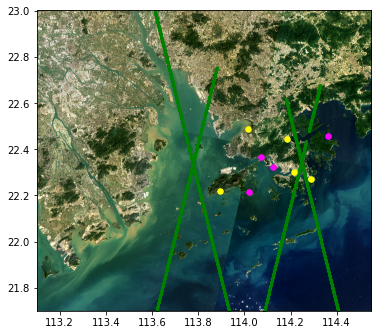

In [4]:
fig = plt.figure(figsize=(6,6))
# imgShow(l8_img)
imgShow(l8_img, extent=l8_extent)
'''sar altimetry data'''
plt.scatter(x=s3al2_260['lon_20_ku'], y=s3al2_260['lat_20_ku'], s=5, color='green')
plt.scatter(x=s3al2_309['lon_20_ku'], y=s3al2_309['lat_20_ku'], s=5, color='green')
plt.scatter(x=s3bl2_260['lon_20_ku'], y=s3bl2_260['lat_20_ku'], s=5, color='green')
plt.scatter(x=s3bl2_309['lon_20_ku'], y=s3bl2_309['lat_20_ku'], s=5, color='green')
'''tgagues data'''
plt.scatter(x=tguage_md['lon'], y=tguage_md['lat'], s=30, color ='magenta')
plt.scatter(x=tguage_obser['lon'], y = tguage_obser['lat'], s=30, color='yellow')
